# *Pre-processing and Feature Extraction*

### Import Utility Methods

In [11]:
from utility.preProcessor import *
from utility.featureExtractor import *

### *Process and Export Feature Dump*

In [16]:
dataClipsDir = './dataset/clips/primate/'
dataClips = sorted(os.listdir(dataClipsDir))

for clip in dataClips:
    exportFeatureDump(f'./dataset/{clip}_freatures.h5', dataClipsDir+clip, clip)



Patient_8 Files: 100%|██████████| 3812/3812 [04:19<00:00, 14.70it/s]


### Load Patients

In [3]:
dataDetails = matToCsv("./dataset/clips/Patient_1/","./dataset/Patient_1_" )

Ictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,-201.118,-44.216,72.758,-2.262,16.618,-132.242,92.706,-9.802,-383.9,-179.072,...,-88.73,-163.932,74.172,-29.542,-150.168,-166.05,225.986,99.368,240.164,46.518
1,-218.118,-64.216,38.758,-40.262,22.618,-153.242,61.706,-0.802,-403.9,-207.072,...,-81.73,-156.932,52.172,6.458,-84.168,-150.05,239.986,71.368,203.164,34.518
2,-248.118,-98.216,1.758,-87.262,16.618,-173.242,51.706,9.198,-423.9,-246.072,...,-95.73,-145.932,34.172,24.458,-22.168,-154.05,231.986,52.368,167.164,19.518
3,-254.118,-112.216,-34.242,-82.262,27.618,-141.242,37.706,14.198,-423.9,-267.072,...,-155.73,-166.932,20.172,21.458,29.832,-143.05,201.986,43.368,141.164,11.518
4,-254.118,-110.216,-92.242,-45.262,19.618,-110.242,4.706,23.198,-396.9,-263.072,...,-220.73,-182.932,15.172,-2.542,27.832,-138.05,184.986,66.368,141.164,11.518



Interictal


,LFG1,LFG10,LFG11,LFG12,LFG13,LFG14,LFG15,LFG16,LFG17,LFG18,...,LFG62,LFG63,LFG64,LFG7,LFG8,LFG9,LFS1,LFS2,LFS3,LFS4
0,22.646,-169.784,-136.374,-91.652,-105.652,255.948,-95.406,-144.63,-333.92,-415.57,...,-111.378,-19.196,54.732,-75.824,36.492,29.388,-257.864,-159.456,-9.202,-76.226
1,10.646,-168.784,-130.374,-93.652,-97.652,273.948,-98.406,-169.63,-363.92,-427.57,...,-99.378,-30.196,40.732,-57.824,41.492,1.388,-250.864,-133.456,-6.202,-63.226
2,5.646,-159.784,-124.374,-54.652,-87.652,267.948,-61.406,-187.63,-357.92,-423.57,...,-82.378,-34.196,11.732,-35.824,48.492,-10.612,-259.864,-100.456,-4.202,-57.226
3,9.646,-156.784,-123.374,-62.652,-93.652,233.948,-17.406,-209.63,-337.92,-409.57,...,-82.378,-31.196,9.732,-30.824,34.492,-19.612,-260.864,-82.456,0.798,-49.226
4,12.646,-157.784,-110.374,-72.652,-86.652,162.948,-0.406,-199.63,-318.92,-409.57,...,-107.378,-49.196,11.732,-24.824,44.492,0.388,-266.864,-92.456,-18.202,-47.226


In [4]:
dataDetails

{'seizure': {'frequency': 499.906994,
  'path': './dataset/Patient_1_upenn_seizure.csv'},
 'baseline': {'frequency': 499.906994,
  'path': './dataset/Patient_1_upenn_baseline.csv'}}

In [ ]:
import pandas as pd

# Define lists to collect baseline and seizure DataFrames
baseline_dfs = []
seizure_dfs = []

# List to store each patient's frequency and path information in a dictionary
patient_data = []

# Process each patient, save CSV, and store frequencies and paths
for patient_num in range(2, 8):
    matPath = f"./dataset/clips/Patient_{patient_num}/"
    csvPath = f"./dataset/Patient_{patient_num}_"
    
    # Generate CSVs and get frequency and path information
    result = matToCsv(matPath, csvPath)
    
    # Store each patient's data in a dictionary
    patient_info = {
        "patient": patient_num,
        "baseline_frequency": result['baseline']['frequency'],
        "baseline_path": result['baseline']['path'],
        "seizure_frequency": result['seizure']['frequency'],
        "seizure_path": result['seizure']['path']
    }
    
    # Append the patient info dictionary to the list
    patient_data.append(patient_info)
    
    # Read the saved CSV files and add to the respective lists for combining later
    baseline_df = pd.read_csv(result['baseline']['path'])
    seizure_df = pd.read_csv(result['seizure']['path'])
    
    baseline_dfs.append(baseline_df)
    seizure_dfs.append(seizure_df)

# Combine baseline and seizure DataFrames by concatenating along columns (axis=1)
combined_baseline_df = pd.concat(baseline_dfs, axis=1)
combined_seizure_df = pd.concat(seizure_dfs, axis=1)

# Save the combined DataFrames to new CSV files
combined_baseline_df.to_csv('./dataset/Patient_2_7_upenn_baseline.csv', index=False)
combined_seizure_df.to_csv('./dataset/Patient_2_7_upenn_seizure.csv', index=False)




# Plot Patients

In [ ]:

for patient in patient_data:
    print(f"Patient {patient['patient']}:")
    plotDataFrame(pd.read_csv(patient['baseline_path']), pd.read_csv(patient['seizure_path']),
              patient['baseline_frequency'], patient['seizure_frequency'])

### **Pre-Processing & Feature Engineering**

**Environment Set-up**

In [7]:
# !pip install matplotlib pandas numpy scipy seaborn mne
# !pip install beautifulsoup4 requests wget
# !pip install h5py tables kaggle
# !pip install wfdb pyEDFlib PyWavelets

In [8]:
import glob            # for file locations
import pprint          # for pretty printing
import re

# colours for printing outputs
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

pp = pprint.PrettyPrinter()

def file_list(folder_path, output=False):
    # create an empty list
    file_list = []
    # for file name in the folder path...
    for filename in glob.glob(folder_path):
        # ... append it to the list
        file_list.append(filename)

    # sort alphabetically
    file_list.sort()

    # Output
    if output:
        print(str(len(file_list)) + " files found")
        pp.pprint(file_list)

    return file_list

Filtering

In [9]:
from utility.filterDesigner import sinc_filter, windowed_fir_filter
sinc_filter('./experiment/sinc_ringing_40hz.png', sfreq=5000.0)
windowed_fir_filter('./experiment/no_ringing_40hz.png', f_p=40.0)

# Feature Engineering

## Welch Method

In [12]:
# Load your Patient2 dataset
df = pd.read_csv("./dataset/Patient_2_upenn_baseline.csv")
print(df.head())

baseline_power = welchBandpower(df, sf=5000.0, band=[8, 12], display_output=False)

print("Baseline Power (8-12 Hz):")
print(baseline_power)

   LMacro_01  LMacro_02  LMacro_03  LMacro_04  LMacro_05  LMacro_06  \
0   -86.8208   -74.1204   -47.0054   -28.2956   -26.6442   -20.7406   
1   -87.8208   -75.1204   -48.0054   -29.2956   -27.6442   -21.7406   
2   -87.8208   -75.1204   -49.0054   -30.2956   -28.6442   -20.7406   
3   -86.8208   -75.1204   -49.0054   -30.2956   -28.6442   -18.7406   
4   -84.8208   -73.1204   -46.0054   -28.2956   -26.6442   -17.7406   

   LMacro_07  LMacro_08  RMacro_01  RMacro_02  RMacro_03  RMacro_04  \
0    -15.459    -1.4766   -68.0176      0.919    25.9564      3.901   
1    -16.459    -1.4766   -70.0176     -1.081    24.9564      2.901   
2    -16.459    -1.4766   -70.0176     -1.081    23.9564      1.901   
3    -15.459    -0.4766   -67.0176      1.919    24.9564      3.901   
4    -12.459     0.5234   -62.0176      6.919    26.9564      7.901   

   RMacro_05  RMacro_06  RMacro_07  RMacro_08  
0   -16.8932     4.3494    22.9692     7.6232  
1   -18.8932     3.3494    20.9692     6.6232  
2 

In [13]:
df

,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
0,-86.8208,-74.1204,-47.0054,-28.2956,-26.6442,-20.7406,-15.459,-1.4766,-68.0176,0.919,25.9564,3.901,-16.8932,4.3494,22.9692,7.6232
1,-87.8208,-75.1204,-48.0054,-29.2956,-27.6442,-21.7406,-16.459,-1.4766,-70.0176,-1.081,24.9564,2.901,-18.8932,3.3494,20.9692,6.6232
2,-87.8208,-75.1204,-49.0054,-30.2956,-28.6442,-20.7406,-16.459,-1.4766,-70.0176,-1.081,23.9564,1.901,-18.8932,2.3494,20.9692,6.6232
3,-86.8208,-75.1204,-49.0054,-30.2956,-28.6442,-18.7406,-15.459,-0.4766,-67.0176,1.919,24.9564,3.901,-17.8932,4.3494,23.9692,8.6232
4,-84.8208,-73.1204,-46.0054,-28.2956,-26.6442,-17.7406,-12.459,0.5234,-62.0176,6.919,26.9564,7.901,-13.8932,8.3494,27.9692,11.6232
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-3.8208,-14.1204,-19.0054,-18.2956,-12.6442,-10.7406,-14.459,-28.4766,-5.0176,-58.081,-113.0436,-53.099,15.1068,-1.6506,-5.0308,12.6232
4996,-3.8208,-14.1204,-18.0054,-18.2956,-12.6442,-9.7406,-12.459,-27.4766,-5.0176,-57.081,-112.0436,-53.099,14.1068,-1.6506,-4.0308,12.6232
4997,-4.8208,-14.1204,-19.0054,-18.2956,-14.6442,-10.7406,-13.459,-27.4766,-7.0176,-58.081,-113.0436,-53.099,13.1068,-2.6506,-3.0308,12.6232
4998,-6.8208,-15.1204,-19.0054,-18.2956,-15.6442,-11.7406,-15.459,-29.4766,-8.0176,-61.081,-115.0436,-54.099,12.1068,-4.6506,-4.0308,11.6232


In [14]:

# Load the Patient2 dataset
patient2_baseline = pd.read_csv("./dataset/Patient_2_upenn_baseline.csv")
patient2_seizure = pd.read_csv("./dataset/Patient_2_upenn_seizure.csv")


# Calculate mean power for baseline and seizure
baseline_power = welchPowerMeasure(patient2_baseline, 5000.0)
seizure_power = welchPowerMeasure(patient2_seizure, 5000.0)


baseline_power.to_csv("./dataset/Patient_2_upenn_baseline_power.csv")
seizure_power.to_csv("./dataset/Patient_2_upenn_seizure_power.csv")


In [15]:
seizure_power

,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
power_delta,542.467408,137.051112,59.964891,40.656045,32.300744,21.239378,21.885723,33.513483,66.805448,25.808528,92.807775,95.804208,167.942907,34.467422,31.741406,32.149927
power_theta,779.156911,459.559067,540.695964,117.522916,199.787797,194.401744,173.074932,166.175878,95.733069,116.563662,245.970930,155.443941,129.439038,37.351474,37.065195,41.264111
power_alpha,818.676936,557.821156,709.188929,162.671607,195.233893,191.207685,169.845727,152.434420,75.639186,100.248914,164.764754,103.082840,40.977637,18.785682,24.155514,27.725716
power_beta,392.635535,490.141019,761.721199,251.814864,67.636424,54.164847,48.812279,47.973194,23.035472,29.316914,46.365520,30.203237,12.619388,9.876285,12.092804,14.681219
power_gamma,72.500630,122.462164,194.232047,66.594594,8.604981,5.835358,5.818140,6.273839,2.745238,3.664050,5.031221,3.512553,2.497917,2.218508,2.405347,2.876951


In [16]:
seizure_power

,LMacro_01,LMacro_02,LMacro_03,LMacro_04,LMacro_05,LMacro_06,LMacro_07,LMacro_08,RMacro_01,RMacro_02,RMacro_03,RMacro_04,RMacro_05,RMacro_06,RMacro_07,RMacro_08
power_delta,542.467408,137.051112,59.964891,40.656045,32.300744,21.239378,21.885723,33.513483,66.805448,25.808528,92.807775,95.804208,167.942907,34.467422,31.741406,32.149927
power_theta,779.156911,459.559067,540.695964,117.522916,199.787797,194.401744,173.074932,166.175878,95.733069,116.563662,245.970930,155.443941,129.439038,37.351474,37.065195,41.264111
power_alpha,818.676936,557.821156,709.188929,162.671607,195.233893,191.207685,169.845727,152.434420,75.639186,100.248914,164.764754,103.082840,40.977637,18.785682,24.155514,27.725716
power_beta,392.635535,490.141019,761.721199,251.814864,67.636424,54.164847,48.812279,47.973194,23.035472,29.316914,46.365520,30.203237,12.619388,9.876285,12.092804,14.681219
power_gamma,72.500630,122.462164,194.232047,66.594594,8.604981,5.835358,5.818140,6.273839,2.745238,3.664050,5.031221,3.512553,2.497917,2.218508,2.405347,2.876951


In [17]:
    
# Load the EEG data
patient_data = pd.read_csv("./dataset/Patient_2_upenn_baseline.csv")

# Calculate band powers for each EEG segment
band_power_df = cumulateBandPower(patient_data, 5000.0)

# Save the transformed data to a CSV file
band_power_df.to_csv("./dataset/Patient_2_upenn_baseline_band_power.csv", index=False)

band_power_df

,LMacro_01_power_delta,LMacro_01_power_theta,LMacro_01_power_alpha,LMacro_01_power_beta,LMacro_01_power_gamma,LMacro_02_power_delta,LMacro_02_power_theta,LMacro_02_power_alpha,LMacro_02_power_beta,LMacro_02_power_gamma,...,RMacro_07_power_delta,RMacro_07_power_theta,RMacro_07_power_alpha,RMacro_07_power_beta,RMacro_07_power_gamma,RMacro_08_power_delta,RMacro_08_power_theta,RMacro_08_power_alpha,RMacro_08_power_beta,RMacro_08_power_gamma
0,316.983289,260.644417,264.443688,37.255653,16.977678,602.336575,287.367048,568.062206,57.300805,16.183451,...,1582.266859,416.261419,236.238566,68.638773,10.162165,1608.986407,394.734528,284.483111,112.678698,11.997441


In [18]:
    
# Load the EEG data
patient_data = pd.read_csv("./dataset/Patient_2_upenn_seizure.csv")

# Calculate band powers for each EEG segment
band_power_df = cumulateBandPower(patient_data, 5000.0)

# Save the transformed data to a CSV file
band_power_df.to_csv("./dataset/Patient_2_upenn_seizure_band_power.csv", index=False)

band_power_df

,LMacro_01_power_delta,LMacro_01_power_theta,LMacro_01_power_alpha,LMacro_01_power_beta,LMacro_01_power_gamma,LMacro_02_power_delta,LMacro_02_power_theta,LMacro_02_power_alpha,LMacro_02_power_beta,LMacro_02_power_gamma,...,RMacro_07_power_delta,RMacro_07_power_theta,RMacro_07_power_alpha,RMacro_07_power_beta,RMacro_07_power_gamma,RMacro_08_power_delta,RMacro_08_power_theta,RMacro_08_power_alpha,RMacro_08_power_beta,RMacro_08_power_gamma
0,1537.846089,2650.58304,2764.902052,1958.131118,217.822027,408.3658,1979.482531,2322.136797,4250.17313,487.187577,...,74.466147,14.69066,41.13132,95.8295,8.194436,76.774389,19.94679,66.253641,141.091283,9.681547


# Generic Neural Net Classifier From Power Measures

In [19]:
import pandas as pd
import numpy as np

# Assuming welchPowerMeasure function is defined to calculate power for different bands

# Load the Patient2 datasets
patient2_baseline = pd.read_csv("./dataset/Patient_2_upenn_baseline.csv")
patient2_seizure = pd.read_csv("./dataset/Patient_2_upenn_seizure.csv")

# Calculate mean power for baseline and seizure
baseline_power = welchPowerMeasure(patient2_baseline, 5000.0)
seizure_power = welchPowerMeasure(patient2_seizure, 5000.0)

# Add labels for classification
baseline_power['label'] = 0  # Baseline data labeled as 0
seizure_power['label'] = 1    # Seizure data labeled as 1

# Combine both datasets
combined_data = pd.concat([baseline_power, seizure_power], ignore_index=True)

# Save the feature datasets
combined_data.to_csv("./dataset/Patient_2_combined_power.csv", index=False)


2024-10-26 14:43:48.632350: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-26 14:43:48.632409: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-26 14:43:48.668586: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-26 14:43:48.741218: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-26 14:43:49.757777: W tensorflow/compiler/tf2

Epoch 1/8


2024-10-26 14:43:51.100301: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-26 14:43:51.100366: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-26 14:43:51.103460: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-26 14:43:51.103523: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:2b:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-10-26 14:43:51.103584: I external/local_xla/xla/stream_executor

3/3 [==============================] - 1s 57ms/step - loss: 0.7352 - accuracy: 0.5000 - val_loss: 0.7504 - val_accuracy: 0.5000
Epoch 2/8
3/3 [==============================] - 0s 12ms/step - loss: 0.6988 - accuracy: 0.6667 - val_loss: 0.7136 - val_accuracy: 0.5000
Epoch 3/8
3/3 [==============================] - 0s 13ms/step - loss: 0.6640 - accuracy: 0.6667 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 4/8
3/3 [==============================] - 0s 12ms/step - loss: 0.6402 - accuracy: 0.6667 - val_loss: 0.6704 - val_accuracy: 0.5000
Epoch 5/8
3/3 [==============================] - 0s 15ms/step - loss: 0.6192 - accuracy: 0.6667 - val_loss: 0.6599 - val_accuracy: 0.5000
Epoch 6/8
3/3 [==============================] - 0s 15ms/step - loss: 0.6017 - accuracy: 0.6667 - val_loss: 0.6553 - val_accuracy: 0.5000
Epoch 7/8
3/3 [==============================] - 0s 11ms/step - loss: 0.5794 - accuracy: 0.8333 - val_loss: 0.6433 - val_accuracy: 0.5000
Epoch 8/8
1/1 [=============================

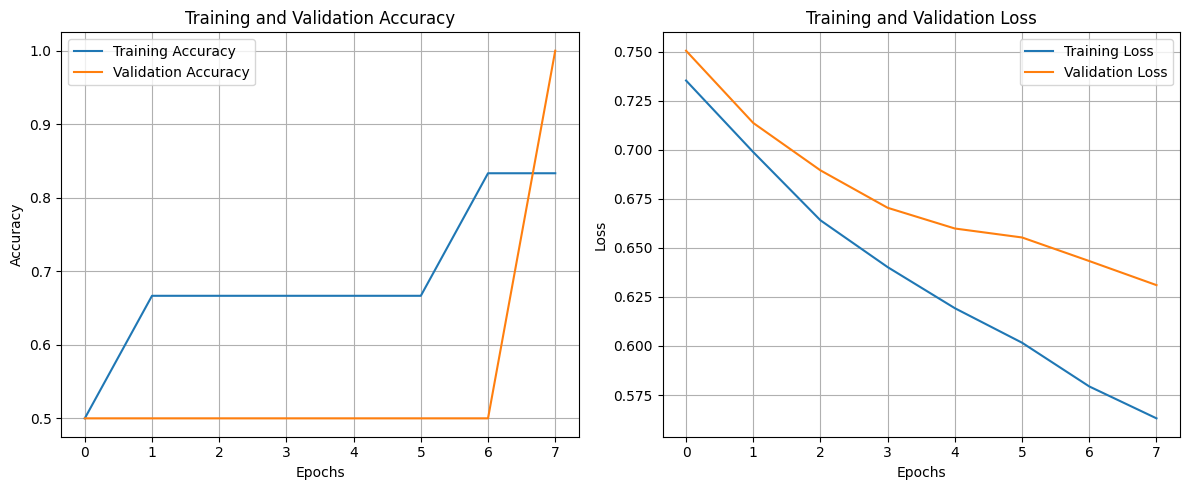

In [20]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from tensorflow import keras
from tensorflow.keras import layers

# Load the combined feature dataset
data = pd.read_csv("./dataset/Patient_2_combined_power.csv")

# Separate features and labels
X = data.drop(columns=['label'])  # Features
y = data['label']  # Labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Deep Neural Network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')  # Sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=8, batch_size=2, validation_split=0.2)

# Evaluate the model on the test set
y_pred = (model.predict(X_test_scaled) > 0.5).astype("int32")  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))
plot_learning_curves(history)


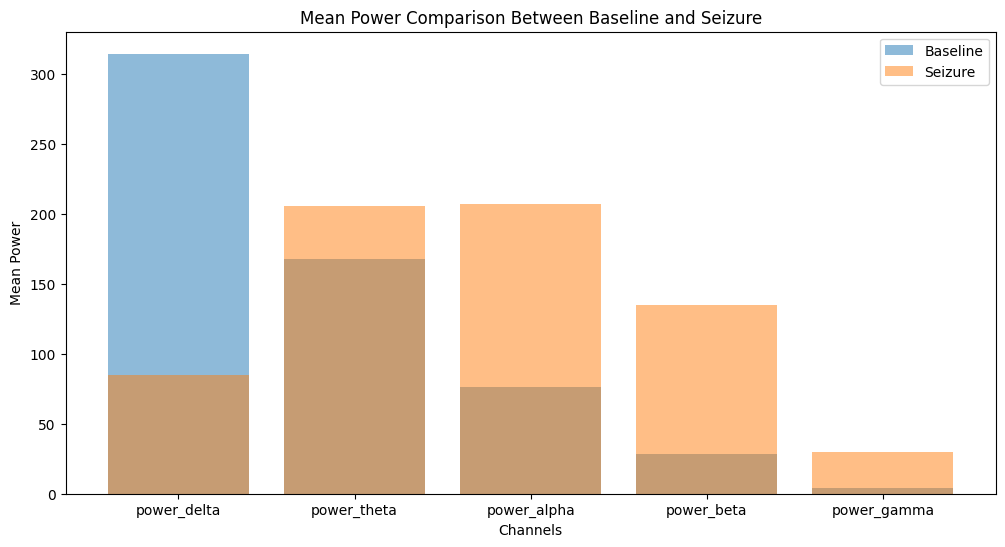

In [21]:
import matplotlib.pyplot as plt
channels = baseline_power.index
baseline_means = baseline_power.mean(axis=1)
seizure_means = seizure_power.mean(axis=1)

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(channels, baseline_means, alpha=0.5, label='Baseline')
plt.bar(channels, seizure_means, alpha=0.5, label='Seizure')
plt.xlabel('Channels')
plt.ylabel('Mean Power')
plt.title('Mean Power Comparison Between Baseline and Seizure')
plt.legend()
plt.show()
